Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
(64, 224, 224, 3)


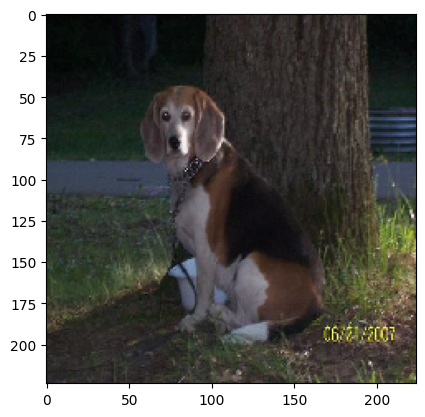

(16, 224, 224, 3)


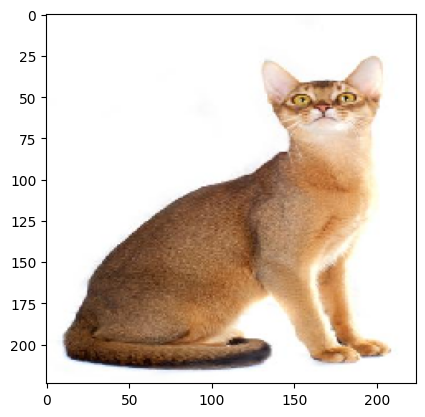

(64, 224, 224, 3)


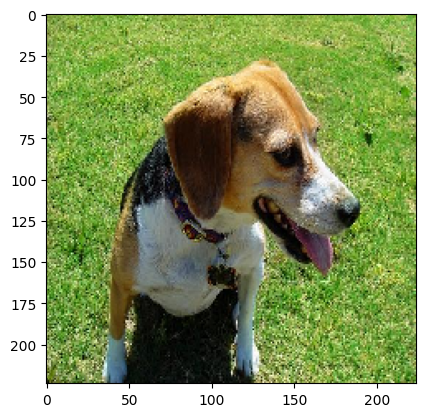

(16, 224, 224, 3)


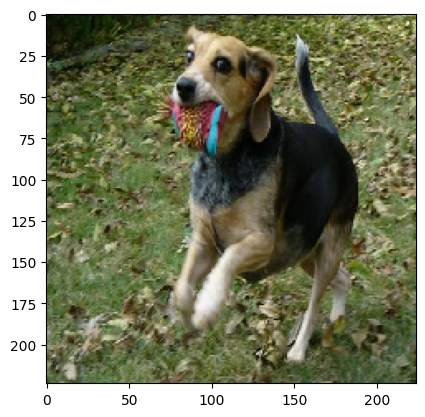

(64, 224, 224, 3)


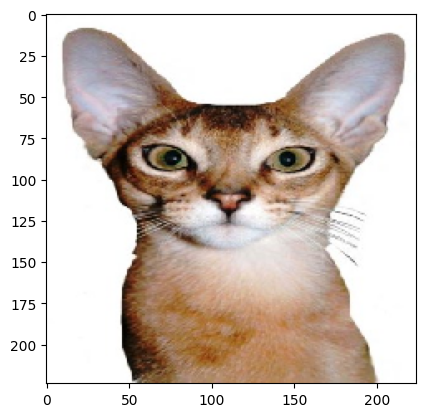

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │   102,760,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,827,554 (392.26 MB)

 Trainable params: 102,827,554 (392.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5729 - loss: 6.3917 - val_accuracy: 0.5000 - val_loss: 5.2800
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5104 - loss: 6.0181 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.5000 - loss: 0.7121 - val_accuracy: 0.4500 - val_loss: 0.6929
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5510 - loss: 0.6906 - val_accuracy: 0.5000 - val_loss: 0.6901
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5344 - loss: 0.6823 - val_accuracy: 0.5000 - val_loss: 0.6874
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 5s/step - accuracy: 0.5583 - loss: 0.7018 - val_accuracy: 0.5500 - val_loss: 0.6827
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.6875 - loss: 0.6779 - val_accuracy: 0.5500 - val_loss: 0.6839
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6438 - loss: 0.6543 - val_accuracy: 0.6500 - val_loss: 0.6408
Epoch 9/20
2/2 

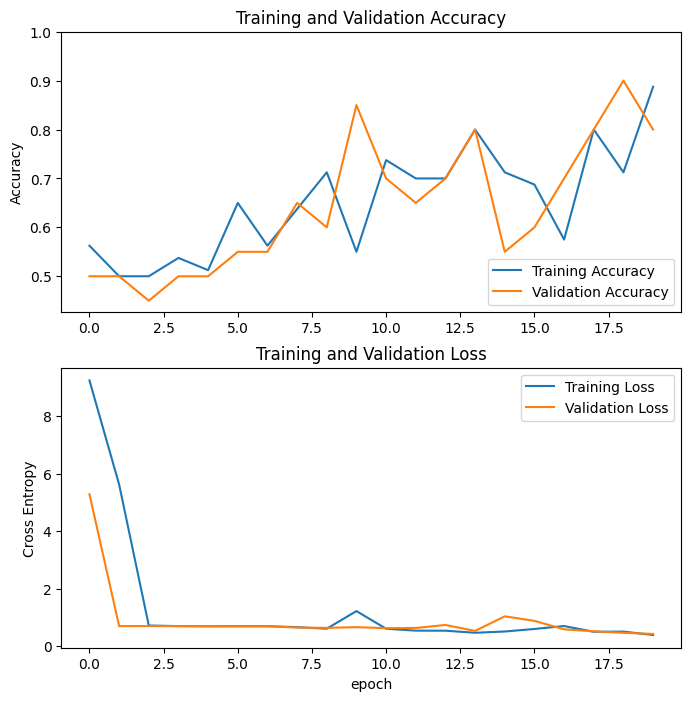

In [4]:
import os

import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
import numpy as np

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#-----1. duplicate data-----

data_path = "data/dataset"
base_dir = os.path.join(data_path)

IMAGE_SIZE = 224 #model input size
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale = 1./255,
        validation_split=0.2)

train_generator = datagen.flow_from_directory(
        base_dir,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size = BATCH_SIZE,
        subset='training')

val_generator = datagen.flow_from_directory(
        base_dir,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size = BATCH_SIZE,
        subset='validation')

#visualisasi

for _ in range(5):
    img, label = train_generator.__next__()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()
    
    
for image_batch,label_batch in train_generator:
    break
image_batch.shape, label_batch.shape

IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
num_classes=2


model = Sequential()
 
#------------------------------------
# Conv Block 1: 32 Filters, MaxPool.
#------------------------------------
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=IMG_SHAPE))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1)) 
#------------------------------------
# Conv Block 2: 64 Filters, MaxPool.
#------------------------------------
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the convolutional features.
#------------------------------------
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'],
             )

model.summary()
epochs = 20
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=val_generator)
loss, acc = model.evaluate(val_generator, verbose=1)
#start plotting here
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
This image most likely belongs to anjing with a 73.11 percent confidence.


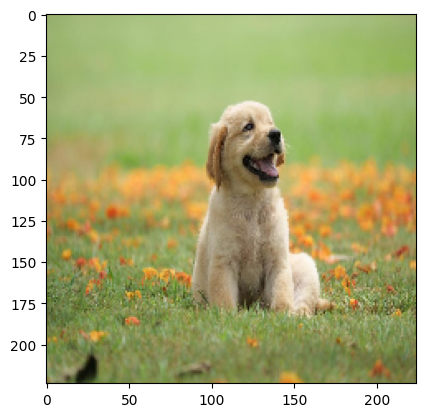

In [7]:
# using the model to predict
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# pick input image
# img_path = 'data/input/Kucing-Oren.webp'
img_path = 'data/input/ilustrasi-anak-anjing_43.jpeg'

# load image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# predict
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# print result
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(["kucing", "anjing"][np.argmax(score)], 100 * np.max(score))
)

# show image
plt.imshow(img)
plt.show()